# Pengolahan Andat Modul 3

dalam modul ini akan dilakukan pengolahan untuk 
- Tugas 1 **Plot FFT** dari temperatur vertikal kedalaman 1- 200 meter di daerah kajian dari tahun 2010 - 2015, 
- Tugas 2 **plot hovmoller** sst waktu terhadap kedalaman 1 - 500 meter & **Plot Low-pass Filter** data temperature vertikal kedalaman 1 - 200 meter dengan periode cut-off 20 hari
- Tugas 3 **Plot Low-pass Filter dan FFT** data pasut daerah kajian dengan periode cut off 6 jam 
- Tugas 4 **Plot Lag korelasi ONI dan SST** (MATLAB)
- Tugas 5 **Plot Wavelet Spektrum SST dan ONI** (MATLAB)
- Tugas 6 **Plot Wavelet Spektrum SST dan ONI** 

Author(s) :
Salbi Faza Rinaldi (12917009)

Revision history 28/09/2020

# Tugas 1
###  Script FFT

In [1]:
import pandas as pd
import numpy as np

sst = pd.read_excel('t0n180w_5day.xlsx',sheet_name='t0n180w_5day',index_col=0) #[CHANGE HERE with File Name]
display (sst.head())

,1,25,50,75,100,125,150,200,250,300,500,QUALITY
Depth(M):,,,,,,,,,,,,
20100103,29.666,29.586,29.838,29.798,28.806,25.298,20.214,14.900,12.062,11.418,8.356,11111111111
20100108,29.748,29.716,29.908,29.924,29.164,23.090,18.952,14.678,12.150,11.374,8.186,11111111111
20100113,29.802,29.810,30.056,29.796,28.596,22.576,19.428,15.254,12.060,11.118,8.330,11111111111
20100118,29.884,29.810,30.002,29.270,27.870,23.012,18.536,14.778,12.194,11.194,8.380,11111111111
20100123,29.778,29.808,30.224,29.722,29.002,24.544,19.590,15.328,12.810,11.682,8.402,11111111111


In [2]:
import datetime

sst['Tanggal'] = sst.index.tolist()
sst['Tanggal'] = sst['Tanggal'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
sst = sst.set_index(sst['Tanggal'])
sst.drop('Tanggal', axis=1, inplace=True)
sst.drop('QUALITY',axis=1,inplace=True)

sst.head()

,1,25,50,75,100,125,150,200,250,300,500
Tanggal,,,,,,,,,,,
2010-01-03,29.666,29.586,29.838,29.798,28.806,25.298,20.214,14.900,12.062,11.418,8.356
2010-01-08,29.748,29.716,29.908,29.924,29.164,23.090,18.952,14.678,12.150,11.374,8.186
2010-01-13,29.802,29.810,30.056,29.796,28.596,22.576,19.428,15.254,12.060,11.118,8.330
2010-01-18,29.884,29.810,30.002,29.270,27.870,23.012,18.536,14.778,12.194,11.194,8.380
2010-01-23,29.778,29.808,30.224,29.722,29.002,24.544,19.590,15.328,12.810,11.682,8.402


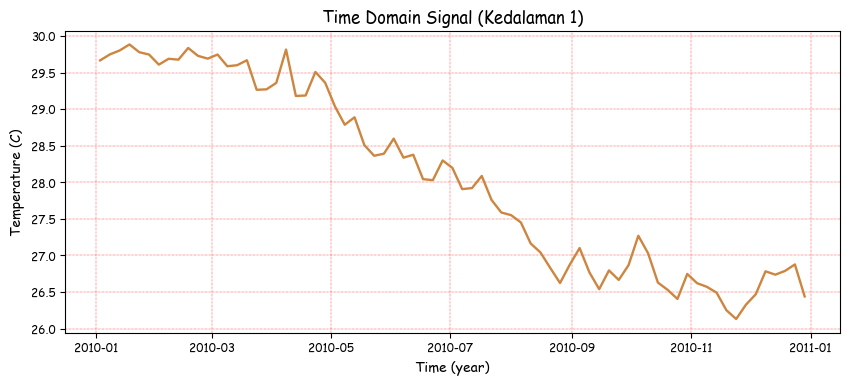

In [3]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Comic Sans MS']

# Plot Data Time Domain Signal 
fig, ax = plt.subplots(figsize=(10,4),dpi=100)
ax.plot(sst[1], color ='peru', lw = 1.7) #[CHANGE HERE with Depth of SST]

ax.set_title('Time Domain Signal (Kedalaman 1)') # [CHANGE HERE with Title of Figure]
ax.set_xlabel('Time (year)', fontweight='light')
ax.set_ylabel('Temperature (C)', fontweight='light')
ax.grid(color='r', ls = '-.', lw = 0.25)

plt.yticks(fontsize = 8.5)
plt.xticks(fontsize = 8.5)
# plt.savefig('TimeDomainSignal_1m.png', dpi=900)
plt.show()

In [4]:
import scipy.fft as fft

Ts = 30 # Sampling periode dalam hari 
# Ts = 3600*24*30 # Sampling Periode dalam detik*
Fs = 1 / Ts # Sampling frekuensi
n = len(sst) # Jumlah data

fft_sst = fft(sst[1],n) # FFT data sst kedalaman 1 meter [CHANGE HERE with Depth of SST]
fff_sst = fft_sst[0:int(n/2)] # Pemotongan Mirror Signal
fff_sst = fff_sst/fft_sst.max()
xfft = Fs/n*np.arange(1,n/2)
pfft = (1./xfft)/Ts # Periode

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  


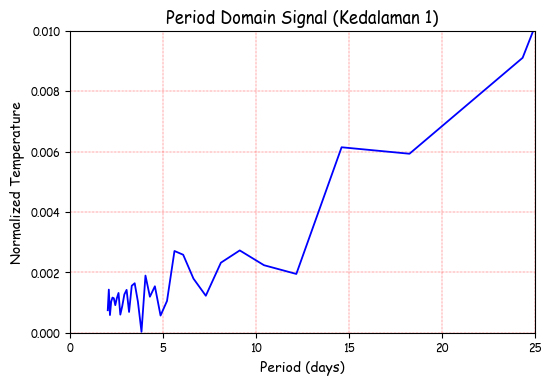

In [5]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Comic Sans MS']

# Plot data
fig, ax = plt.subplots(figsize=(6,4),dpi=100)
ax.plot(pfft,abs(fff_sst),color='b', lw = 1.3)

ax.set_title('Period Domain Signal (Kedalaman 1)') #[CHANGE HERE with Title of Figure]
ax.set_xlabel('Period (days)', fontweight='light')
ax.set_ylabel('Normalized Temperature', fontweight='light')

ax.set(xlim=(0,25),ylim=(0,0.01)) #[CHANGE HERE with the limit of axis Figure]
ax.grid(color='r', ls = '-.', lw = 0.25)

plt.xticks(fontsize=8)
plt.yticks(fontsize=8) 
# plt.savefig('PeriodDomainSignal_1m.png', dpi=900)
plt.show()

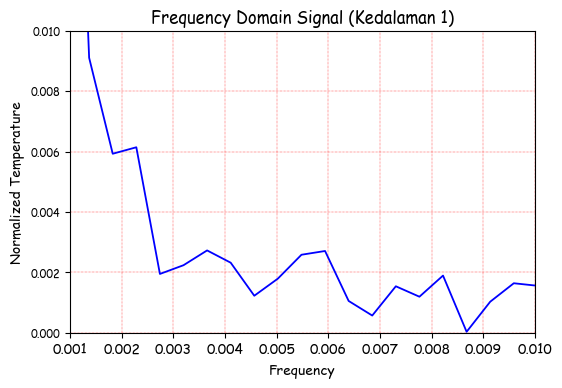

In [6]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Comic Sans MS']

# Plot data
fig, ax = plt.subplots(figsize=(6,4),dpi=100)
ax.plot(xfft,abs(fff_sst), color = 'b', lw = 1.3)

ax.set_title('Frequency Domain Signal (Kedalaman 1)') # [CHANGE HERE with Title of Figure]
ax.set_xlabel('Frequency')
ax.set_ylabel('Normalized Temperature')
ax.grid(color='r', ls = '-.', lw = 0.25)

axlim , aylim = (.001,.01), (0,.01)
# x2 = np.arange(0,axlim[1]+(axlim[1]/10),axlim[1]/10)
xlabels2 = np.arange(0,11,1)

ax.set(xlim=axlim,ylim=aylim)
# plt.xticks(x2,xlabels2, fontsize=8)
plt.yticks(fontsize=8)
plt.savefig('Tes.png', dpi=900)
plt.show()

# Tugas 2

### Script Depth-Time

In [7]:
import pandas as pd
import numpy as np

hovmoller = pd.read_excel('t0n180w_5day.xlsx',sheet_name='t0n180w_5day',index_col=0) #[CHANGE HERE with File Name]
display (hovmoller.head())

,1,25,50,75,100,125,150,200,250,300,500,QUALITY
Depth(M):,,,,,,,,,,,,
20100103,29.666,29.586,29.838,29.798,28.806,25.298,20.214,14.900,12.062,11.418,8.356,11111111111
20100108,29.748,29.716,29.908,29.924,29.164,23.090,18.952,14.678,12.150,11.374,8.186,11111111111
20100113,29.802,29.810,30.056,29.796,28.596,22.576,19.428,15.254,12.060,11.118,8.330,11111111111
20100118,29.884,29.810,30.002,29.270,27.870,23.012,18.536,14.778,12.194,11.194,8.380,11111111111
20100123,29.778,29.808,30.224,29.722,29.002,24.544,19.590,15.328,12.810,11.682,8.402,11111111111


In [8]:
import datetime

hovmoller['Tanggal'] = hovmoller.index.tolist()
hovmoller['Tanggal'] = hovmoller['Tanggal'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d').date())
hovmoller = hovmoller.set_index(hovmoller['Tanggal'])
hovmoller.drop('Tanggal', axis=1, inplace=True)
hovmoller.drop('QUALITY',axis=1,inplace=True)

hovmoller.head()

,1,25,50,75,100,125,150,200,250,300,500
Tanggal,,,,,,,,,,,
2010-01-03,29.666,29.586,29.838,29.798,28.806,25.298,20.214,14.900,12.062,11.418,8.356
2010-01-08,29.748,29.716,29.908,29.924,29.164,23.090,18.952,14.678,12.150,11.374,8.186
2010-01-13,29.802,29.810,30.056,29.796,28.596,22.576,19.428,15.254,12.060,11.118,8.330
2010-01-18,29.884,29.810,30.002,29.270,27.870,23.012,18.536,14.778,12.194,11.194,8.380
2010-01-23,29.778,29.808,30.224,29.722,29.002,24.544,19.590,15.328,12.810,11.682,8.402


In [9]:
hovmoller2 = hovmoller.transpose()
hovmoller1 = hovmoller2.reindex(index=hovmoller2.index[::-1])
hovmoller_col = hovmoller2.columns[1:len(hovmoller1.columns):7]

display(hovmoller1)

Tanggal,2010-01-03,2010-01-08,2010-01-13,2010-01-18,2010-01-23,2010-01-28,2010-02-02,2010-02-07,2010-02-12,2010-02-17,...,2010-11-14,2010-11-19,2010-11-24,2010-11-29,2010-12-04,2010-12-09,2010-12-14,2010-12-19,2010-12-24,2010-12-29
500,8.356,8.186,8.330,8.380,8.402,8.786,8.890,8.430,8.802,8.958,...,8.934,8.906,8.692,8.604,8.786,8.636,8.434,8.420,8.530,8.586
300,11.418,11.374,11.118,11.194,11.682,11.962,12.030,11.852,11.894,11.792,...,12.706,12.606,12.626,12.812,12.566,12.350,12.016,11.700,11.706,11.810
250,12.062,12.150,12.060,12.194,12.810,13.452,13.214,13.198,13.176,13.234,...,14.068,14.320,14.508,14.704,14.430,14.352,14.130,13.906,13.494,13.400
200,14.900,14.678,15.254,14.778,15.328,16.250,16.616,16.390,16.392,15.588,...,16.784,17.708,17.962,17.888,18.142,17.362,16.978,16.858,16.420,17.998
150,20.214,18.952,19.428,18.536,19.590,21.916,22.350,20.690,21.136,20.548,...,23.732,24.080,23.562,24.070,24.694,23.968,23.786,23.452,22.388,22.640
125,25.298,23.090,22.576,23.012,24.544,26.952,27.562,27.026,25.824,24.820,...,25.982,25.848,24.544,24.622,25.156,25.632,25.352,25.486,26.218,25.700
100,28.806,29.164,28.596,27.870,29.002,29.690,29.828,29.846,30.032,29.494,...,26.232,26.242,25.554,25.296,25.466,25.998,26.010,26.238,26.628,26.170
75,29.798,29.924,29.796,29.270,29.722,29.838,29.732,29.714,29.788,29.764,...,26.356,26.208,25.922,25.582,26.032,26.306,26.294,26.518,26.774,26.336
50,29.838,29.908,30.056,30.002,30.224,29.744,29.700,29.666,29.692,29.788,...,26.386,26.180,26.024,25.988,26.326,26.586,26.542,26.664,26.832,26.400
25,29.586,29.716,29.810,29.810,29.808,29.718,29.694,29.676,29.690,29.810,...,26.414,26.176,26.068,26.170,26.408,26.714,26.682,26.734,26.864,26.424


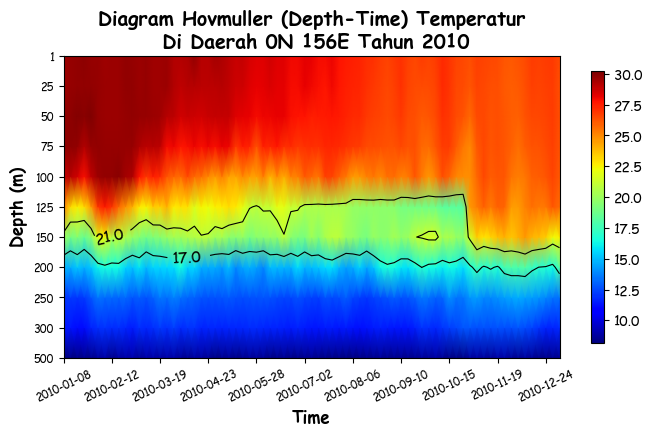

In [10]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Comic Sans MS']

# Plot Data
fig, ax = plt.subplots(figsize=(8,4),dpi=100)
im = ax.pcolormesh(hovmoller1,cmap='jet',shading='gouraud')
cs = plt.contour(hovmoller1, [17,21], colors='k',linewidths=.8)

ax.set_title('Diagram Hovmuller (Depth-Time) Temperatur'+
             '\n Di Daerah 0N 156E Tahun 2010',
             weight='bold',fontsize = 14)  # [CHANGE HERE with Title of Figure]
ax.set_xlabel('Time',weight='bold',fontsize=12)
ax.set_ylabel('Depth (m)',weight='bold',fontsize=12)
plt.xticks(np.arange(0,len(hovmoller1.columns),7),hovmoller_col,rotation=25, fontsize=8)
plt.yticks(np.arange(0,len(hovmoller1.index),1),hovmoller1.index, fontsize=8)
fig.colorbar(im,ax=ax, shrink = .9)

plt.clabel(cs, fmt = '%2.1f', fontsize=11)
plt.show()

### Script Low-Pass-Filter

In [11]:
import pandas as pd
import numpy as np

raw_data = pd.read_excel('t0n180w_5day.xlsx',sheet_name='t0n180w_5day', index_col=0)

In [12]:
import datetime

raw_data['Tanggal'] = raw_data.index.tolist()
raw_data['Tanggal'] = raw_data['Tanggal'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
raw_data = raw_data.set_index(raw_data['Tanggal'])
raw_data.drop('Tanggal', axis=1, inplace=True)
raw_data.drop('QUALITY', axis=1, inplace=True)

raw_data.head()

,1,25,50,75,100,125,150,200,250,300,500
Tanggal,,,,,,,,,,,
2010-01-03,29.666,29.586,29.838,29.798,28.806,25.298,20.214,14.900,12.062,11.418,8.356
2010-01-08,29.748,29.716,29.908,29.924,29.164,23.090,18.952,14.678,12.150,11.374,8.186
2010-01-13,29.802,29.810,30.056,29.796,28.596,22.576,19.428,15.254,12.060,11.118,8.330
2010-01-18,29.884,29.810,30.002,29.270,27.870,23.012,18.536,14.778,12.194,11.194,8.380
2010-01-23,29.778,29.808,30.224,29.722,29.002,24.544,19.590,15.328,12.810,11.682,8.402


In [13]:
from scipy import signal

Ts = 3600*24*5 # periode pengambilan data dalam sekon
fs = 1/Ts  # Frekuensi sampling, satuan Hz

fc = 1/(3600*24*20)  # Frekuensi cut-off = 20 hari, satuan 1/s atau Hz
w = fc / (fs / 2) # Normalisasi frekuensi

b, a = signal.butter(5, w, 'low') # desain filter untuk 'low pass'
elevasi_filter = signal.filtfilt(b, a, raw_data[1]) # implementasi filter ke data

raw_data['sst_filter'] = elevasi_filter

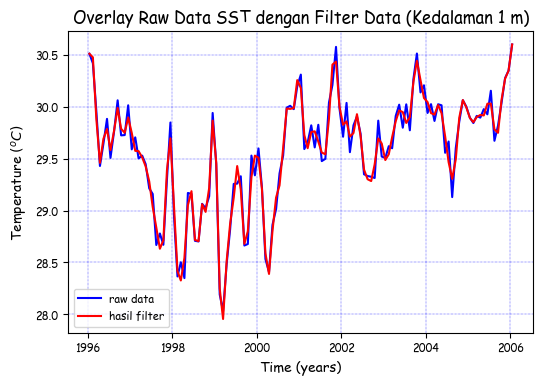

In [37]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Comic Sans MS']

# Plot Data
fig, ax = plt.subplots(dpi=100)
ax.plot(raw_data[1],color = 'b', label='raw data') #[CHANGE HERE with Depth of SST]
ax.plot(raw_data['sst_filter'],color = 'r', label='hasil filter')
ax.legend(loc='best',fontsize=8)

ax.set(xlabel = ('Time (years)'), ylabel = ('Temperature $(^oC)$')) 
ax.set_title('Overlay Raw Data SST dengan Filter Data (Kedalaman 1 m)')  # [CHANGE HERE with Title of Figure]
ax.grid(color='b', ls = '-.', lw = 0.25)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
# plt.savefig('Tes.png', dpi=900)

plt.show()

# Tugas 3
### Script Low-pass Filter

In [15]:
import pandas as pd
import numpy as np

sst = pd.read_excel('contoh.xlsx',sheet_name='contoh',index_col=0)
display (sst.head())

,1,25,50,75,100,125,150,200,250,300,500
Depth(M):,,,,,,,,,,,
19960116,30.512,30.249,30.152,29.665,28.816,26.917,21.645,17.835,13.810,12.607,8.297
19960215,30.420,30.316,30.273,29.873,29.017,25.730,22.591,18.328,14.177,12.349,8.134
19960316,29.955,29.879,29.802,29.632,29.311,27.546,22.794,17.702,14.421,12.442,8.161
19960416,29.430,29.207,29.092,28.956,28.658,27.891,24.500,18.814,14.717,12.339,8.047
19960516,29.645,29.451,29.323,28.982,28.640,27.830,24.770,19.205,14.045,11.908,8.198


In [16]:
import datetime

sst['Tanggal'] = sst.index.tolist()
sst['Tanggal'] = sst['Tanggal'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
sst = sst.set_index(sst['Tanggal'])
sst.drop('Tanggal', axis=1, inplace=True)

sst.head()

,1,25,50,75,100,125,150,200,250,300,500
Tanggal,,,,,,,,,,,
1996-01-16,30.512,30.249,30.152,29.665,28.816,26.917,21.645,17.835,13.810,12.607,8.297
1996-02-15,30.420,30.316,30.273,29.873,29.017,25.730,22.591,18.328,14.177,12.349,8.134
1996-03-16,29.955,29.879,29.802,29.632,29.311,27.546,22.794,17.702,14.421,12.442,8.161
1996-04-16,29.430,29.207,29.092,28.956,28.658,27.891,24.500,18.814,14.717,12.339,8.047
1996-05-16,29.645,29.451,29.323,28.982,28.640,27.830,24.770,19.205,14.045,11.908,8.198


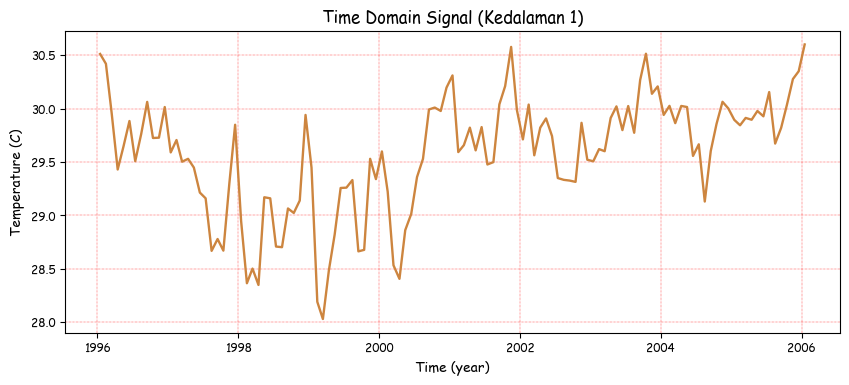

In [17]:
import matplotlib.pyplot as plt

# Plot Data Time Domain Signal 
fig, ax = plt.subplots(figsize=(10,4),dpi=100)
ax.plot(sst[1], color ='peru', lw = 1.7) #[CHANGE HERE]

ax.set_title('Time Domain Signal (Kedalaman 1)')  # [CHANGE HERE with Title of Figure]
ax.set_xlabel('Time (year)', fontweight='light')
ax.set_ylabel('Temperature (C)', fontweight='light')
ax.grid(color='r', ls = '-.', lw = 0.25)

plt.yticks(fontsize = 8.5)
plt.xticks(fontsize = 8.5)
# plt.savefig('TimeDomainSignal_1m.png', dpi=900)
plt.show()

In [18]:
import scipy.fft as fft

Ts = 30 # Sampling periode dalam hari 
# Ts = 3600*24*30 # Sampling Periode dalam detik*
Fs = 1 / Ts # Sampling frekuensi
n = len(sst[1]) # Jumlah data

fft_sst = fft(sst[1],n) # FFT data sst kedalaman 1 meter [CODE HERE]
fff_sst = fft_sst[0:int(n/2)] # Pemotongan Mirror Signal
fff_sst = fff_sst/fft_sst.max()
xfft = Fs/n*np.arange(1,n/2)
pfft = (1./xfft)/Ts # Periode

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  


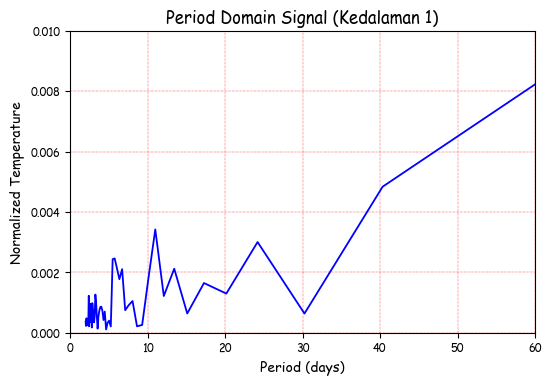

In [19]:
import matplotlib.pyplot as plt

# Plot data
fig, ax = plt.subplots(figsize=(6,4),dpi=100)
ax.plot(pfft,abs(fff_sst),color='b', lw = 1.3)

ax.set_title('Period Domain Signal (Kedalaman 1)')  # [CHANGE HERE with Title of Figure]
ax.set_xlabel('Period (days)', fontweight='light')
ax.set_ylabel('Normalized Temperature', fontweight='light')

ax.set(xlim=(0,60),ylim=(0,0.01))
ax.grid(color='r', ls = '-.', lw = 0.25)

plt.xticks(fontsize=8)
plt.yticks(fontsize=8) 
# plt.savefig('PeriodDomainSignal_1m.png', dpi=900)
plt.show()

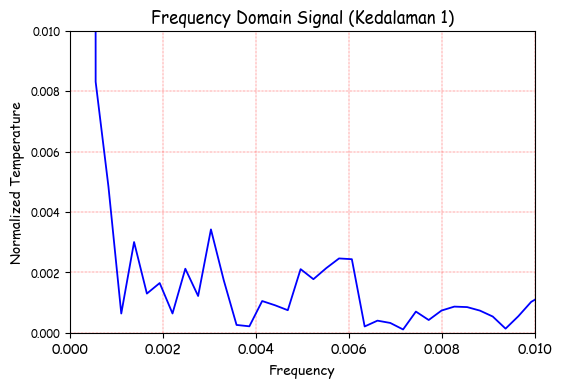

In [20]:
import matplotlib.pyplot as plt

# Plot data
fig, ax = plt.subplots(figsize=(6,4),dpi=100)
ax.plot(xfft,abs(fff_sst), color = 'b', lw = 1.3)

ax.set_title('Frequency Domain Signal (Kedalaman 1)')  # [CHANGE HERE with Title of Figure]
ax.set_xlabel('Frequency')
ax.set_ylabel('Normalized Temperature')
ax.grid(color='r', ls = '-.', lw = 0.25)

axlim , aylim = (0,0.01), (0,0.01)
x2 = np.arange(0,axlim[1]+(axlim[1]/10),axlim[1]/10)
xlabels2 = np.arange(0,11,1)

ax.set(xlim=axlim,ylim=aylim)
# plt.xticks(x2,xlabels2, fontsize=8)
plt.yticks(fontsize=8)
plt.savefig('Tes.png', dpi=900)
plt.show()

In [21]:
import pandas as pd

raw_data = pd.read_excel('contoh.xlsx',sheet_name='contoh', index_col=0)

In [22]:
import datetime

raw_data['Tanggal'] = raw_data.index.tolist()
raw_data['Tanggal'] = raw_data['Tanggal'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
raw_data = raw_data.set_index(raw_data['Tanggal'])
raw_data.drop('Tanggal', axis=1, inplace=True)

raw_data.head()

,1,25,50,75,100,125,150,200,250,300,500
Tanggal,,,,,,,,,,,
1996-01-16,30.512,30.249,30.152,29.665,28.816,26.917,21.645,17.835,13.810,12.607,8.297
1996-02-15,30.420,30.316,30.273,29.873,29.017,25.730,22.591,18.328,14.177,12.349,8.134
1996-03-16,29.955,29.879,29.802,29.632,29.311,27.546,22.794,17.702,14.421,12.442,8.161
1996-04-16,29.430,29.207,29.092,28.956,28.658,27.891,24.500,18.814,14.717,12.339,8.047
1996-05-16,29.645,29.451,29.323,28.982,28.640,27.830,24.770,19.205,14.045,11.908,8.198


In [23]:
from scipy import signal

Ts = 3600*24*30 # periode pengambilan data dalam sekon
fs = 1/Ts  # Frekuensi sampling, satuan Hz

fc = 1/(3600*24*90)  # Frekuensi cut-off = 3 bulan, satuan 1/s atau Hz
w = fc / (fs / 2) # Normalisasi frekuensi

b, a = signal.butter(5, w, 'low') # desain filter untuk 'low pass'
elevasi_filter = signal.filtfilt(b, a, raw_data[1]) # implementasi filter ke data

raw_data['sst_filter'] = elevasi_filter

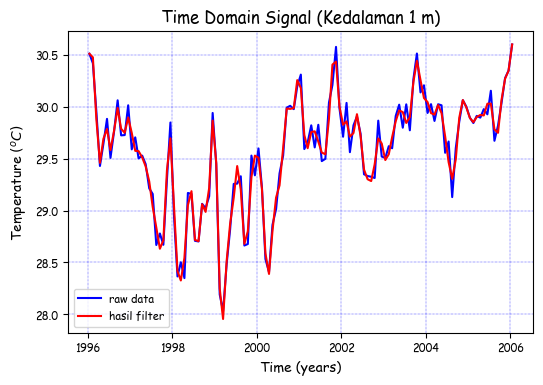

In [24]:
import matplotlib.pyplot as plt

# Plot Data
fig, ax = plt.subplots(dpi=100)
ax.plot(raw_data[1],color = 'b', label='raw data')
ax.plot(raw_data['sst_filter'],color = 'r', label='hasil filter')
ax.legend(loc='best',fontsize=8)

ax.set(xlabel = ('Time (years)'), ylabel = ('Temperature $(^oC)$'))
ax.set_title('Time Domain Signal (Kedalaman 1 m)')  # [CHANGE HERE with Title of Figure]
ax.grid(color='b', ls = '-.', lw = 0.25)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
# plt.savefig('Tes.png', dpi=900)

plt.show()

# Tugas 6 (Bonus)

In [25]:
from __future__ import division
import numpy
from matplotlib import pyplot

import pycwt as wavelet
from pycwt.helpers import find

In [26]:
url = 'http://paos.colorado.edu/research/wavelets/wave_idl/nino3sst.txt'
dat = numpy.genfromtxt(url, skip_header=19)
# dat = numpy.loadtxt('ONI_Salbi.txt')
title = 'NINO3 Sea Surface Temperature'
label = 'NINO3 SST'
units = 'degC'
t0 = 1871.0
# t0 = 1996
# dt = 0.083
dt = 0.25  # In years

In [27]:
N = dat.size
t = numpy.arange(0, N) * dt + t0

In [28]:
p = numpy.polyfit(t - t0, dat, 1)
dat_notrend = dat - numpy.polyval(p, t - t0)
std = dat_notrend.std()  # Standard deviation
var = std ** 2  # Variance
dat_norm = dat_notrend / std  # Normalized dataset

In [29]:
mother = wavelet.Morlet(6)
s0 = 2 * dt  # Starting scale, in this case 2 * 0.25 years = 6 months
dj = 1 / 12  # Twelve sub-octaves per octaves
J = 7 / dj  # Seven powers of two with dj sub-octaves
alpha, _, _ = wavelet.ar1(dat)  # Lag-1 autocorrelation for red noise

In [30]:
wave, scales, freqs, coi, fft, fftfreqs = wavelet.cwt(dat_norm, dt, dj, s0, J,
                                                      mother)
iwave = wavelet.icwt(wave, scales, dt, dj, mother) * std

In [31]:
power = (numpy.abs(wave)) ** 2
fft_power = numpy.abs(fft) ** 2
period = 1 / freqs

In [32]:
# power /= scales[:, None]

In [33]:
signif, fft_theor = wavelet.significance(1.0, dt, scales, 0, alpha,
                                         significance_level=0.95,
                                         wavelet=mother)
sig95 = numpy.ones([1, N]) * signif[:, None]
sig95 = power / sig95

In [34]:
glbl_power = power.mean(axis=1)
dof = N - scales  # Correction for padding at edges
glbl_signif, tmp = wavelet.significance(var, dt, scales, 1, alpha,
                                        significance_level=0.95, dof=dof,
                                        wavelet=mother)

In [35]:
sel = find((period >= 2) & (period < 8))
Cdelta = mother.cdelta
scale_avg = (scales * numpy.ones((N, 1))).transpose()
scale_avg = power / scale_avg  # As in Torrence and Compo (1998) equation 24
scale_avg = var * dj * dt / Cdelta * scale_avg[sel, :].sum(axis=0)
scale_avg_signif, tmp = wavelet.significance(var, dt, scales, 2, alpha,
                                             significance_level=0.95,
                                             dof=[scales[sel[0]],
                                                  scales[sel[-1]]],
                                             wavelet=mother)

C:\Users\User\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


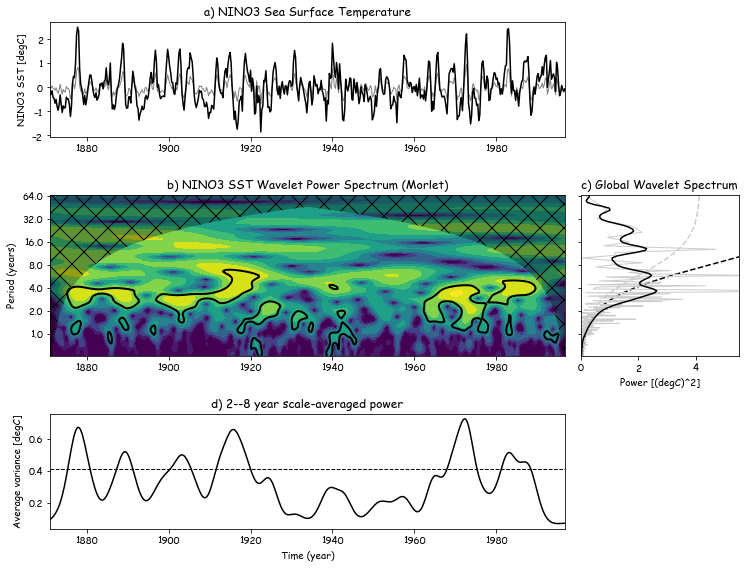

In [36]:
# Prepare the figure
pyplot.close('all')
pyplot.ioff()
figprops = dict(figsize=(11, 8), dpi=72)
fig = pyplot.figure(**figprops)

# First sub-plot, the original time series anomaly and inverse wavelet
# transform.
ax = pyplot.axes([0.1, 0.75, 0.65, 0.2])
ax.plot(t, iwave, '-', linewidth=1, color=[0.5, 0.5, 0.5])
ax.plot(t, dat, 'k', linewidth=1.5)
ax.set_title('a) {}'.format(title))
ax.set_ylabel(r'{} [{}]'.format(label, units))

# Second sub-plot, the normalized wavelet power spectrum and significance
# level contour lines and cone of influece hatched area. Note that period
# scale is logarithmic.
bx = pyplot.axes([0.1, 0.37, 0.65, 0.28], sharex=ax)
levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16]
bx.contourf(t, numpy.log2(period), numpy.log2(power), numpy.log2(levels),
            extend='both', cmap=pyplot.cm.viridis)
extent = [t.min(), t.max(), 0, max(period)]
bx.contour(t, numpy.log2(period), sig95, [-99, 1], colors='k', linewidths=2,
           extent=extent)
bx.fill(numpy.concatenate([t, t[-1:] + dt, t[-1:] + dt,
                           t[:1] - dt, t[:1] - dt]),
        numpy.concatenate([numpy.log2(coi), [1e-9], numpy.log2(period[-1:]),
                           numpy.log2(period[-1:]), [1e-9]]),
        'k', alpha=0.3, hatch='x')
bx.set_title('b) {} Wavelet Power Spectrum ({})'.format(label, mother.name))
bx.set_ylabel('Period (years)')
#
Yticks = 2 ** numpy.arange(numpy.ceil(numpy.log2(period.min())),
                           numpy.ceil(numpy.log2(period.max())))
bx.set_yticks(numpy.log2(Yticks))
bx.set_yticklabels(Yticks)

# Third sub-plot, the global wavelet and Fourier power spectra and theoretical
# noise spectra. Note that period scale is logarithmic.
cx = pyplot.axes([0.77, 0.37, 0.2, 0.28], sharey=bx)
cx.plot(glbl_signif, numpy.log2(period), 'k--')
cx.plot(var * fft_theor, numpy.log2(period), '--', color='#cccccc')
cx.plot(var * fft_power, numpy.log2(1./fftfreqs), '-', color='#cccccc',
        linewidth=1.)
cx.plot(var * glbl_power, numpy.log2(period), 'k-', linewidth=1.5)
cx.set_title('c) Global Wavelet Spectrum')
cx.set_xlabel(r'Power [({})^2]'.format(units))
cx.set_xlim([0, glbl_power.max() + var])
cx.set_ylim(numpy.log2([period.min(), period.max()]))
cx.set_yticks(numpy.log2(Yticks))
cx.set_yticklabels(Yticks)
pyplot.setp(cx.get_yticklabels(), visible=False)

# Fourth sub-plot, the scale averaged wavelet spectrum.
dx = pyplot.axes([0.1, 0.07, 0.65, 0.2], sharex=ax)
dx.axhline(scale_avg_signif, color='k', linestyle='--', linewidth=1.)
dx.plot(t, scale_avg, 'k-', linewidth=1.5)
dx.set_title('d) {}--{} year scale-averaged power'.format(2, 8))
dx.set_xlabel('Time (year)')
dx.set_ylabel(r'Average variance [{}]'.format(units))
ax.set_xlim([t.min(), t.max()])

pyplot.show()